In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
data = pd.read_csv('Loan_Data.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
ProfileReport(data).to_file(output_file = "Initial_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Ala-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# TODO: Come up with better dataframes names
dfHighCorr = data[['Loan_ID','LoanAmount', 'Credit_History']].dropna()

In [5]:
# TODO: consider implementing KNN
dfNotHighCorr = data[['Loan_ID', 'Gender', 'Dependents', 'Self_Employed', 'Loan_Amount_Term']]
# TODO: think of better alternative
# dfNotHighCorr = dfNotHighCorr.fillna(dfNotHighCorr.median())

# dfNotHighCorr['Gender']=dfNotHighCorr['Gender'].fillna(dfNotHighCorr['Gender'].mode()[0])
# dfNotHighCorr['Loan_Amount_Term']=dfNotHighCorr['Loan_Amount_Term'].fillna(dfNotHighCorr['Loan_Amount_Term'].mode()[0])
# dfNotHighCorr['Dependents']=dfNotHighCorr['Dependents'].fillna(dfNotHighCorr['Dependents'].mode()[0])
# dfNotHighCorr['Self_Employed']=dfNotHighCorr['Self_Employed'].fillna(dfNotHighCorr['Self_Employed'].mode()[0])

dfNotHighCorr = dfNotHighCorr.dropna()

**dfPart**: merging high correlation data frame with non-high correlation data frame

In [6]:
dfPart = pd.merge(dfHighCorr, dfNotHighCorr, on='Loan_ID')

In [7]:
dfRest = data.loc[:, ['Loan_ID','Married','Education', 'ApplicantIncome', 'CoapplicantIncome', 'Property_Area', 'Loan_Status']]

In [8]:
df = pd.merge(dfRest, dfPart, on='Loan_ID')

Hot Encoding

In [9]:
# 'Married', 'Education', 'Loan_Status', 'Gender', 'Self_Employed'
df = df.replace(['Yes', 'No'], [0, 1])
df = df.replace(['Graduate', 'Not Graduate'], [0, 1])
df = df.replace(['Y', 'N'], [0, 1])
df = df.replace(['Male', 'Female'], [0, 1])
df = df.replace(['3+'], [3])

In [10]:
df = pd.get_dummies(df, columns=['Property_Area'])

In [11]:
df = pd.get_dummies(df, columns=['Dependents'])
# TODO: reposition Dependents_3 column

one last step is to put target at the end of the data frame

In [12]:
target = df.pop('Loan_Status')
df = df.assign(Loan_Status = target)

In [13]:
ProfileReport(df).to_file(output_file = "Final_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Ala-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)


In [ ]:
df

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender,Self_Employed,Loan_Amount_Term,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Loan_Status
0,0,0,4583,1508.0,128.0,1.0,0,1,360.0,1,0,0,0,0,1,0,1
1,0,0,3000,0.0,66.0,1.0,0,0,360.0,0,0,1,0,1,0,0,0
2,0,1,2583,2358.0,120.0,1.0,0,1,360.0,0,0,1,0,1,0,0,0
3,1,0,6000,0.0,141.0,1.0,0,1,360.0,0,0,1,0,1,0,0,0
4,0,0,5417,4196.0,267.0,1.0,0,0,360.0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,0,2900,0.0,71.0,1.0,1,1,360.0,1,0,0,0,1,0,0,0
476,0,0,4106,0.0,40.0,1.0,0,1,180.0,1,0,0,1,0,0,0,0
477,0,0,8072,240.0,253.0,1.0,0,1,360.0,0,0,1,0,0,1,0,0
478,0,0,7583,0.0,187.0,1.0,0,1,360.0,0,0,1,0,0,0,1,0


In [ ]:
# TODO: Dropping `Loan_ID` and merge it after? any other ways to map it for later?
df = df.drop('Loan_ID', axis=1)

modeling

In [ ]:
# Allocate inputs
X = df.drop('Loan_Status', axis=1)

# Allocate outputs
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

apply feature selection using extra tree classifier

In [ ]:
# TODO

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.74      0.98      0.84        63
           1       0.92      0.33      0.49        33

    accuracy                           0.76        96
   macro avg       0.83      0.66      0.67        96
weighted avg       0.80      0.76      0.72        96
 
confusion matrix
 [[62  1]
 [22 11]] 

Accuracy = 0.7604166666666666


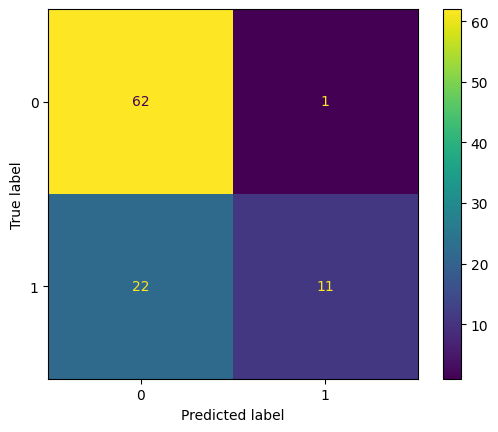

In [ ]:
lr = LogisticRegression(random_state = 1, max_iter=400).fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Confusion Matrix and reports
print("CLASSIFICATION REPORT\n", 
      classification_report(y_test, y_pred_lr),
      "\nconfusion matrix\n",
      confusion_matrix(y_test, y_pred_lr),
      "\n\nAccuracy =",
      accuracy_score(y_test, y_pred_lr)
      )
cm = confusion_matrix(y_test, y_pred_lr) 
display = ConfusionMatrixDisplay(
    confusion_matrix = cm, display_labels = lr.classes_)
display.plot()
plt.show()

Decision Tree Classifier

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        63
           1       0.52      0.52      0.52        33

    accuracy                           0.67        96
   macro avg       0.63      0.63      0.63        96
weighted avg       0.67      0.67      0.67        96
 
confusion matrix
 [[47 16]
 [16 17]] 

Accuracy = 0.6666666666666666


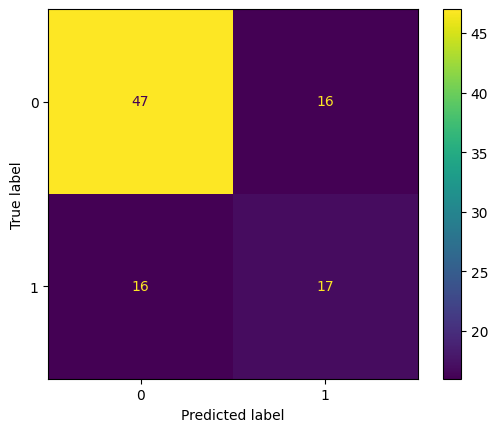

In [ ]:
# create the decision tree classifier
dect = DecisionTreeClassifier(random_state=42)

# fit the decision tree classifier to the data
dect.fit(X_train, y_train)

y_pred_dect = dect.predict(X_test)

# Confusion Matrix and reports
print("CLASSIFICATION REPORT\n", 
      classification_report(y_test, y_pred_dect),
      "\nconfusion matrix\n",
      confusion_matrix(y_test, y_pred_dect),
      "\n\nAccuracy =",
      accuracy_score(y_test, y_pred_dect)
      )
cm = confusion_matrix(y_test, y_pred_dect) 
display = ConfusionMatrixDisplay(
    confusion_matrix = cm, display_labels = dect.classes_)
display.plot()
plt.show()

Random Forest Classifier

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.72      0.90      0.80        63
           1       0.65      0.33      0.44        33

    accuracy                           0.71        96
   macro avg       0.68      0.62      0.62        96
weighted avg       0.70      0.71      0.68        96
 
confusion matrix
 [[57  6]
 [22 11]] 

Accuracy = 0.7083333333333334


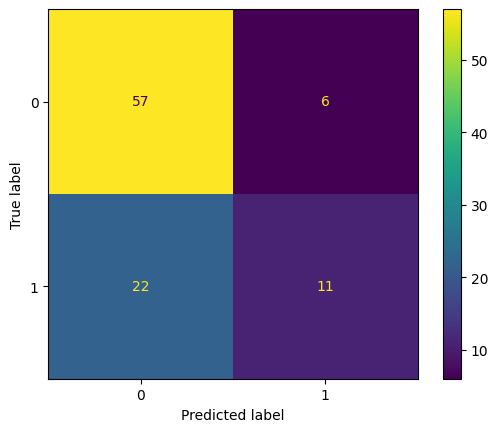

In [ ]:
# create the random forest classifier
randf = RandomForestClassifier(random_state=42)

# fit the random forest classifier to the data
randf.fit(X_train, y_train)

y_pred_randf = randf.predict(X_test)

# Confusion Matrix and reports
print("CLASSIFICATION REPORT\n", 
      classification_report(y_test, y_pred_randf),
      "\nconfusion matrix\n",
      confusion_matrix(y_test, y_pred_randf),
      "\n\nAccuracy =",
      accuracy_score(y_test, y_pred_randf)
      )
cm = confusion_matrix(y_test, y_pred_randf) 
display = ConfusionMatrixDisplay(
    confusion_matrix = cm, display_labels = randf.classes_)
display.plot()
plt.show()